## Lead Scoring Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Step 1: Importing 

In [882]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [883]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [884]:
# Importing all datasets
Leads = pd.read_csv("Leads.csv")
Leads.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


### Step 2: Inspecting the Dataframe and  EDA

In [885]:
# Let's check the dimensions of the dataframe
Leads.shape

(9240, 37)

In [886]:
# let's look at the statistical aspects of the dataframe
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [887]:
Leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [888]:
# Let's see the type of each column
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [889]:
# is_null values in columns
Leads_null_col = Leads.isnull().sum()/len(Leads)*100
Leads_null_col.sort_values(ascending= False) # Sorting null column %

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [890]:
Leads_null_col_high = Leads_null_col[Leads_null_col.values >30.00].index.tolist()  #null % more than 30 treated as high
Leads.drop(Leads_null_col_high,axis = 1, inplace=True)  # dropping columns with high null values

Leads_null_col = Leads.isnull().sum()/len(Leads)*100
Leads_null_col.sort_values(ascending= False) # Sorting null column %

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

In [891]:
# Get the value counts of all the columns

for col in Leads.columns:
    print(Leads[col].astype('category').value_counts())
    print('-'*50)

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
--------------------------------------------------
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
--------------------------------------------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
--

Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.

In [892]:
#Leads['Do Not Call'].value_counts().plot.bar()     # bar plot of high assymetric value columns

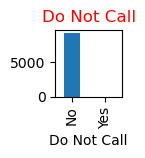

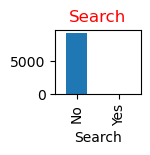

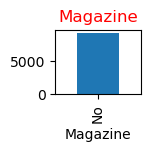

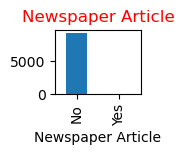

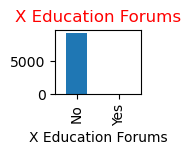

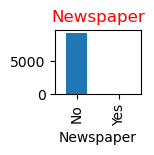

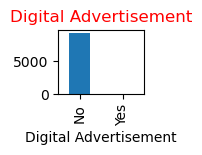

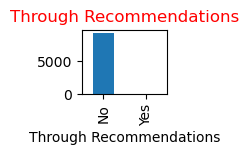

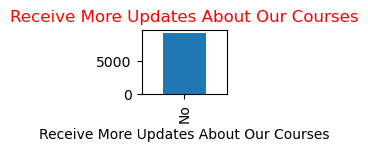

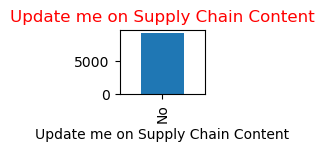

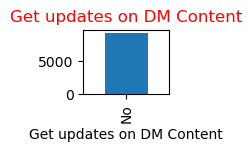

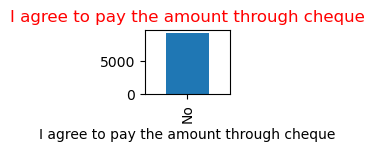

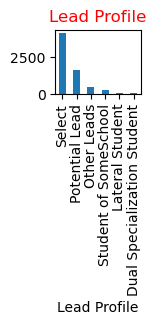

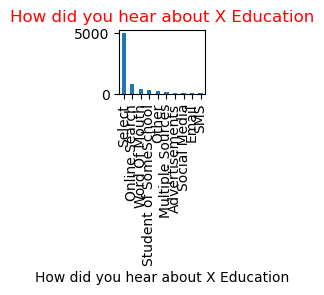

In [893]:
#Analysing assymetric variables/columns

flag_list = ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque','Lead Profile', 'How did you hear about X Education']
plt.figure(figsize=(5,5))
x =1
for flag in flag_list:
    x += 1 
    plt.subplot(5,5,x)
    Leads[flag].value_counts().plot(kind = 'bar')
    plt.title(flag, color='red')
    plt.show()

In [894]:
Leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque','Lead Profile', 'How did you hear about X Education'],axis=1,inplace=True)

In [895]:
Leads.shape

(9240, 17)

Also, the variable `What matters most to you in choosing a course` has the level `Better Career Prospects` `6528` times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [896]:
Leads.drop(['What matters most to you in choosing a course'],axis=1, inplace= True)

In [897]:
(100*Leads.isnull().sum()/len(Leads)).sort_values(ascending=False)
# is_null values in columns


What is your current occupation           29.112554
Country                                   26.634199
Specialization                            15.562771
City                                      15.367965
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Lead Source                                0.389610
Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
Total Time Spent on Website                0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [898]:
Leads.shape

(9240, 16)

In [899]:
# Get the value counts of all the columns

for col in Leads.columns:
    print(Leads[col].astype('category').value_counts())
    print('-'*50)

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
--------------------------------------------------
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
--------------------------------------------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
--

Still country and 'Do not email' are majority one type data so we ll drop those

In [900]:
Leads.drop(['Do Not Email',"Country"],axis=1,inplace=True)

In [901]:
(100*Leads.isnull().sum()/len(Leads)).sort_values(ascending=False)
# is_null values in columns


What is your current occupation           29.112554
Specialization                            15.562771
City                                      15.367965
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Lead Source                                0.389610
Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Converted                                  0.000000
Total Time Spent on Website                0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

Now we can check rows and impute or drop rows based on the above valuecounts

In [902]:
Leads['What is your current occupation'].value_counts() #occupation is useful data so will not drop

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [903]:
Leads = Leads[~pd.isnull(Leads['What is your current occupation'])] # Dropping rows with null data in 'What is your current occupation'
(100*Leads.isnull().sum()/len(Leads)).sort_values(ascending=False)


TotalVisits                               1.984733
Page Views Per Visit                      1.984733
Last Activity                             1.572519
Lead Source                               0.549618
Specialization                            0.274809
Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Converted                                 0.000000
Total Time Spent on Website               0.000000
What is your current occupation           0.000000
City                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

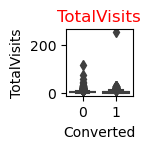

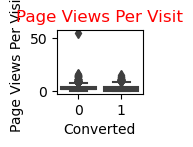

In [904]:
#plotting and analysing Target variable with respect to numerical columns using box plot
num_col = ['TotalVisits','Page Views Per Visit']
plt.figure(figsize=(5,5))
x =1
for flag in num_col:
    x += 1 
    plt.subplot(5,5,x)
    sns.boxplot(data=Leads,x="Converted", y=flag)
    plt.title(flag, color='red')
    plt.show()

In [905]:
#Imputing for num columns total visits and page views per visit
num_col = ['TotalVisits','Page Views Per Visit']

for i in num_col:# iterating through each numerical column
    if Leads[i].isnull().mean()>0:# checking whether missing values are present or not
        med=Leads[i].median()# if present calculating median of that column
        Leads[i]=Leads[i].fillna(med)#  replacing missing values with median

In [906]:
Leads = Leads[~pd.isnull(Leads['What is your current occupation'])]
(100*Leads.isnull().sum()/len(Leads)).sort_values(ascending=False)

Last Activity                             1.572519
Lead Source                               0.549618
Specialization                            0.274809
Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Converted                                 0.000000
TotalVisits                               0.000000
Total Time Spent on Website               0.000000
Page Views Per Visit                      0.000000
What is your current occupation           0.000000
City                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [907]:
# Remaining cat columns has less % of missing values so it is safe to fill with mode
cat_col = ['Last Activity','Lead Source','Specialization']
for i in cat_col:# iterating through each categorical column
    if Leads[i].isnull().mean()>0:# checking whether missing values are present or not
        mod=Leads[i].mode()[0]# if present calculating mode of that column
        Leads[i]=Leads[i].fillna(mod)# finally replacing missing values with mode

In [908]:
Leads = Leads[~pd.isnull(Leads['What is your current occupation'])]
(100*Leads.isnull().sum()/len(Leads)).sort_values(ascending=False)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Now all the data is null free so total rows that remained are:

In [909]:
Leads.shape  #70 % data is still there

(6550, 14)

In [910]:
# Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, 
# so it's best that we drop these two variables.
Leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [911]:
Leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Mumbai,No,Modified


In [912]:
for i in Leads.columns:
    print(Leads[i].astype('category').value_counts())
    print("-"*50)
    


Lead Origin
Landing Page Submission    3644
API                        2141
Lead Add Form               718
Lead Import                  46
Quick Add Form                1
Name: count, dtype: int64
--------------------------------------------------
Lead Source
Google               2084
Direct Traffic       1891
Olark Chat            893
Organic Search        870
Reference             534
Welingak Website      142
Referral Sites         75
Facebook               46
Click2call              4
bing                    3
Live Chat               2
Social Media            2
Pay per Click Ads       1
Press_Release           1
WeLearn                 1
testone                 1
Name: count, dtype: int64
--------------------------------------------------
Converted
0    3359
1    3191
Name: count, dtype: int64
--------------------------------------------------
TotalVisits
0.0      1375
2.0      1228
3.0      1070
4.0       825
5.0       578
6.0       337
1.0       270
7.0       225
8.0       163
9

Specialization and city has "select" as column option so we will deat with it separartely

In [913]:
# # Creating dummy variable separately for the variable 'Specialization' and 'City' since it has the level 'Select' 
# which is useless so we
# drop that level by specifying it explicitly
dummy = pd.get_dummies(Leads[["Specialization",'City']])
dummy= dummy.drop(['Specialization_Select','City_Select'], axis=1)
dummy.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [914]:
dummy.shape

(6550, 24)

In [915]:
Leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Mumbai,No,Modified


In [916]:
# Add the results to the master dataframe
Leads = pd.concat([Leads, dummy], axis=1)

In [917]:
Leads.shape

(6550, 36)

In [918]:
# Check the columns which are of type 'object'

temp = Leads.select_dtypes(include=['object'])
temp.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [919]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(Leads[['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
Leads = pd.concat([Leads, dummy], axis=1)

In [920]:
dummy.shape

(6550, 53)

In [921]:
# Drop the variables for which the dummy variables have been created

Leads = Leads.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation','Specialization','City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [922]:
Leads.shape


(6550, 81)

### Step 3: Test-Train Split

The next step is to split the dataset into training an testing sets.

In [923]:
#Import library
from sklearn.model_selection import train_test_split

In [924]:
# Put all the feature variables in X

X = Leads.drop(['Converted'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,2.0,1428,1.0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [925]:
# Put the target variable in y

y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

Now we don't have any missing values

In [926]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 4: Feature Scaling

In [927]:
from sklearn.preprocessing import StandardScaler

In [928]:
# Scale the three numeric features present in the dataset - 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'


scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 
                                            'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8766,1.833515,0.079143,0.563008,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
148,0.355247,-0.552124,0.023613,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
8146,2.572649,2.220569,2.098209,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2782,-0.876644,-0.956694,-1.128940,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6309,-0.876644,-0.956694,-1.128940,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [929]:
### Checking the Conversion Rate
Converted = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
Converted

48.717557251908396

We have almost 48% conversion rate

### Step 5: Looking at Correlations

In [930]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [931]:
Leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,1,2.0,1428,1.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


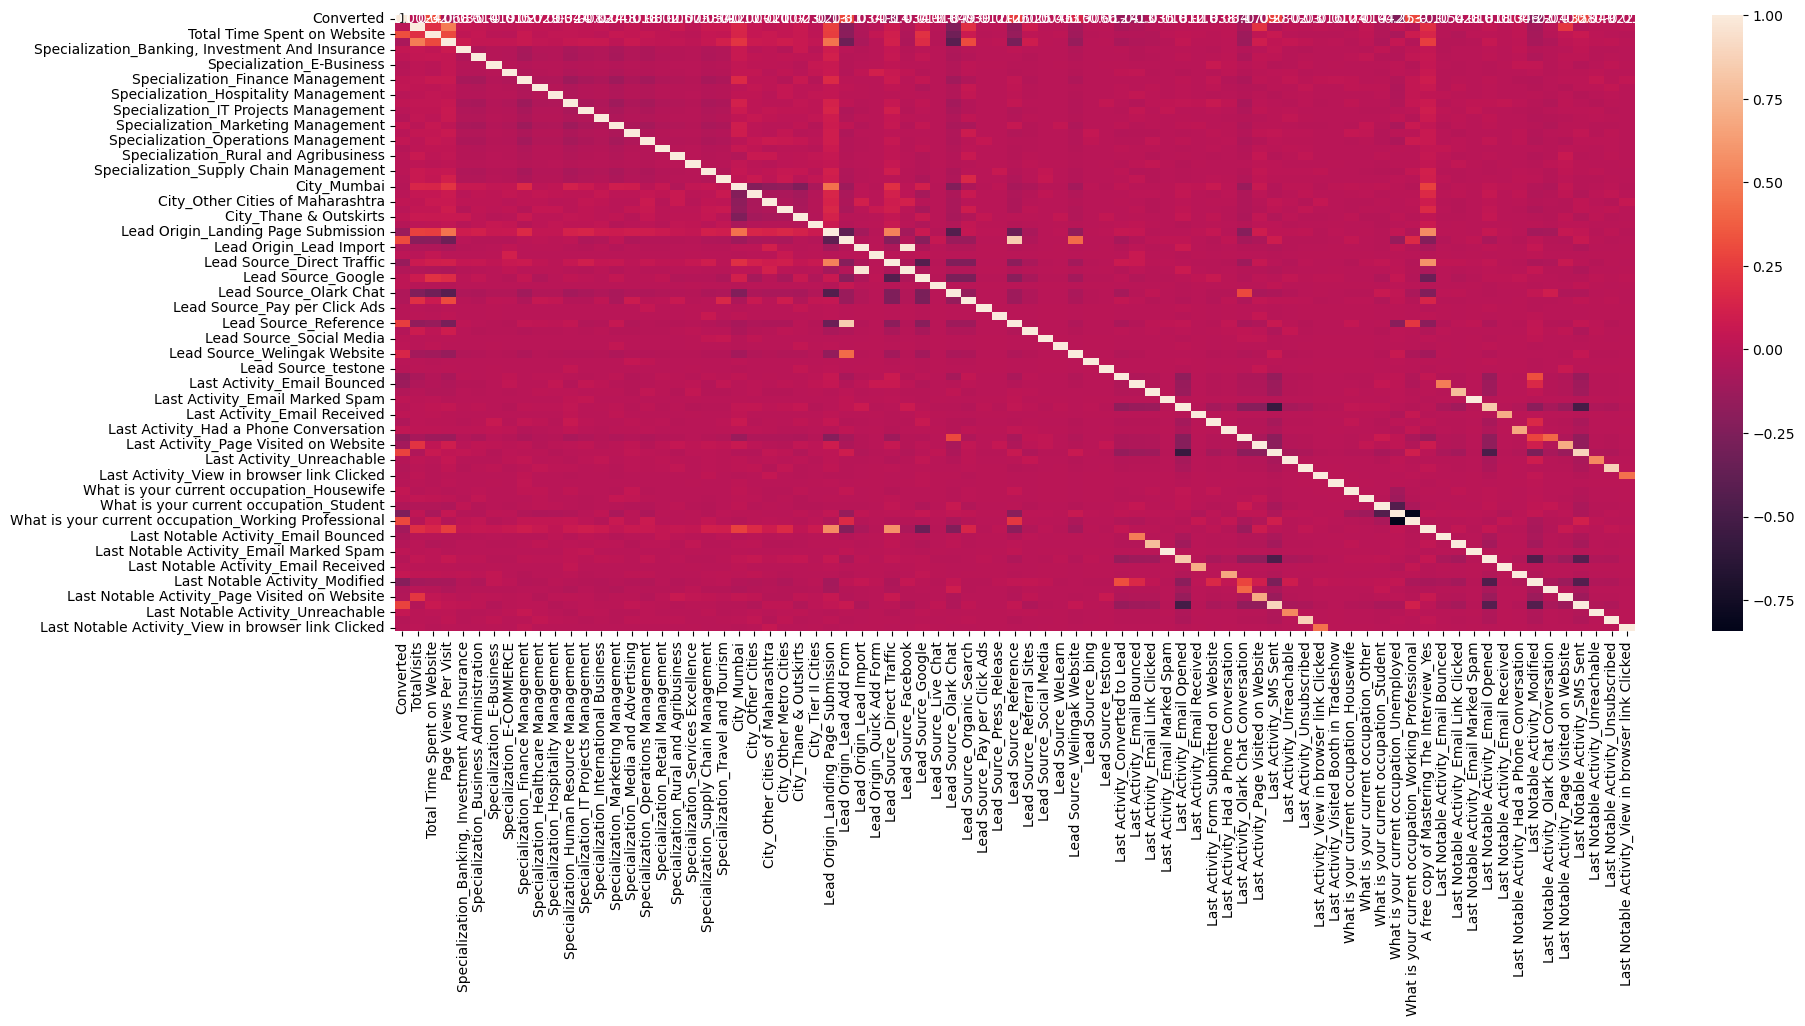

In [932]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,8))        # Size of the figure
sns.heatmap(Leads.corr(),annot = True)
plt.show()


#### No need to drop any highly correlated dummy variable

After dropping highly correlated variables now let's check the correlation matrix again.

### Step 6: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [933]:
import statsmodels.api as sm

### Step 7: Feature Selection Using RFE

In [934]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [935]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [936]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,  True, False, False, False, False,  True, False,
        True,  True,  True, False, False, False, False, False, False,
        True,  True, False, False, False,  True,  True, False])

In [937]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 46),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 45),
 ('Specialization_Banking, Investment And Insurance', False, 13),
 ('Specialization_Business Administration', False, 24),
 ('Specialization_E-Business', False, 43),
 ('Specialization_E-COMMERCE', False, 16),
 ('Specialization_Finance Management', False, 19),
 ('Specialization_Healthcare Management', False, 22),
 ('Specialization_Hospitality Management', False, 35),
 ('Specialization_Human Resource Management', False, 18),
 ('Specialization_IT Projects Management', False, 21),
 ('Specialization_International Business', False, 25),
 ('Specialization_Marketing Management', False, 15),
 ('Specialization_Media and Advertising', False, 61),
 ('Specialization_Operations Management', False, 20),
 ('Specialization_Retail Management', False, 47),
 ('Specialization_Rural and Agribusiness', False, 14),
 ('Specialization_Services Excellence', False, 41),
 ('Specialization_Supply Chain Manag

In [938]:
col = X_train.columns[rfe.support_]     # Put all the columns selected by RFE in the variable 'col'

In [939]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [940]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Mumbai', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outski

##### Assessing the model with StatsModels

In [941]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4569
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2091.8
Date:                Tue, 26 Nov 2024   Deviance:                       4183.6
Time:                        23:19:55   Pearson chi2:                 4.75e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3765
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0440      0.613     -0.072      0.943      -1.246       1.158
Total Time Spent on Website                              1.1251      0.046     24.395      0.000       1.035       1.215
Lead Origin_Lead Add Form                                3.4737      0.197     17.615      0.000       3.087       3.860
Lead Source_Olark Chat                                   1.4459      0.120     12.060      0.000       1.211       1.681
Lead Source_Welingak Website                             2.5366      1.026      2.471      0.013       0.525       4.548
Last Activity_Email Bounced                             -1.3503      0.303     -4.455      0.000      -1.944      -0.756
Last Activity_Olark Chat Conversation                   -0.7923      0.192     -4.135      0.000      -1.168      -0.417
Last Activity_SMS Sent                                   0.9735      0.084     11.617      0.000       0.809       1.138
What is your current occupation_Housewife               23.0700   2.37e+04      0.001      0.999   -4.65e+04    4.65e+04
What is your current occupation_Student                 -0.8203      0.649     -1.264      0.206      -2.092       0.452
What is your current occupation_Unemployed              -0.7623      0.614     -1.242      0.214      -1.965       0.441
What is your current occupation_Working Professional     1.7860      0.639      2.796      0.005       0.534       3.038
Last Notable Activity_Had a Phone Conversation          23.4123   2.25e+04      0.001      0.999   -4.41e+04    4.42e+04
Last Notable Activity_Modified                          -0.8432      0.092     -9.132      0.000      -1.024      -0.662
Last Notable Activity_Unreachable                        2.5730      0.804      3.200      0.001       0.997       4.149
Last Notable Activity_Unsubscribed                      -0.9430      0.541     -1.742      0.082      -2.004       0.118
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [942]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [943]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].astype(float).values, i) for i in range(X_train[col].astype(float).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.48
12,Last Notable Activity_Modified,1.78
6,Last Activity_SMS Sent,1.73
1,Lead Origin_Lead Add Form,1.53
2,Lead Source_Olark Chat,1.47
5,Last Activity_Olark Chat Conversation,1.34
10,What is your current occupation_Working Profes...,1.33
3,Lead Source_Welingak Website,1.24
0,Total Time Spent on Website,1.21
4,Last Activity_Email Bounced,1.09


All the VIFs are in range (below 5) so we will try for p-value now

In [944]:
#lets drop "What is your current occupation_Housewife"
col = col.drop('What is your current occupation_Housewife', 1)

In [945]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4570
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2094.8
Date:                Tue, 26 Nov 2024   Deviance:                       4189.6
Time:                        23:19:56   Pearson chi2:                 4.76e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3757
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6314      0.531      1.190      0.234      -0.409       1.671
Total Time Spent on Website                              1.1238      0.046     24.381      0.000       1.033       1.214
Lead Origin_Lead Add Form                                3.4766      0.197     17.650      0.000       3.091       3.863
Lead Source_Olark Chat                                   1.4445      0.120     12.051      0.000       1.210       1.679
Lead Source_Welingak Website                             2.5321      1.026      2.467      0.014       0.520       4.544
Last Activity_Email Bounced                             -1.3515      0.303     -4.460      0.000      -1.946      -0.758
Last Activity_Olark Chat Conversation                   -0.8029      0.192     -4.188      0.000      -1.179      -0.427
Last Activity_SMS Sent                                   0.9729      0.084     11.613      0.000       0.809       1.137
What is your current occupation_Student                 -1.4947      0.572     -2.615      0.009      -2.615      -0.374
What is your current occupation_Unemployed              -1.4375      0.531     -2.707      0.007      -2.478      -0.397
What is your current occupation_Working Professional     1.1101      0.559      1.985      0.047       0.014       2.206
Last Notable Activity_Had a Phone Conversation          22.4119   1.37e+04      0.002      0.999   -2.68e+04    2.68e+04
Last Notable Activity_Modified                          -0.8408      0.092     -9.118      0.000      -1.022      -0.660
Last Notable Activity_Unreachable                        2.5691      0.805      3.193      0.001       0.992       4.146
Last Notable Activity_Unsubscribed                      -0.9430      0.541     -1.742      0.082      -2.004       0.118
========================================================================================================================
"""

In [946]:
#lets drop "What is your current occupation_Housewife" as it has high p value
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)

In [947]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4571
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2099.5
Date:                Tue, 26 Nov 2024   Deviance:                       4199.0
Time:                        23:19:57   Pearson chi2:                 4.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3744
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6360      0.531      1.198      0.231      -0.404       1.676
Total Time Spent on Website                              1.1234      0.046     24.413      0.000       1.033       1.214
Lead Origin_Lead Add Form                                3.4722      0.197     17.631      0.000       3.086       3.858
Lead Source_Olark Chat                                   1.4397      0.120     12.025      0.000       1.205       1.674
Lead Source_Welingak Website                             2.5321      1.026      2.467      0.014       0.520       4.544
Last Activity_Email Bounced                             -1.3560      0.303     -4.475      0.000      -1.950      -0.762
Last Activity_Olark Chat Conversation                   -0.8047      0.192     -4.198      0.000      -1.180      -0.429
Last Activity_SMS Sent                                   0.9647      0.084     11.528      0.000       0.801       1.129
What is your current occupation_Student                 -1.4943      0.572     -2.614      0.009      -2.615      -0.374
What is your current occupation_Unemployed              -1.4319      0.531     -2.696      0.007      -2.473      -0.391
What is your current occupation_Working Professional     1.1157      0.559      1.995      0.046       0.019       2.212
Last Notable Activity_Modified                          -0.8474      0.092     -9.197      0.000      -1.028      -0.667
Last Notable Activity_Unreachable                        2.5589      0.805      3.181      0.001       0.982       4.136
Last Notable Activity_Unsubscribed                      -0.9516      0.541     -1.758      0.079      -2.013       0.109
========================================================================================================================
"""

In [948]:
#lets drop "Last Notable Activity_Unsubscribed" as it has p value more than 0.05
col = col.drop('Last Notable Activity_Unsubscribed', 1)

In [949]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4572
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2101.2
Date:                Tue, 26 Nov 2024   Deviance:                       4202.4
Time:                        23:19:57   Pearson chi2:                 4.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3740
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6306      0.530      1.189      0.235      -0.409       1.670
Total Time Spent on Website                              1.1236      0.046     24.423      0.000       1.033       1.214
Lead Origin_Lead Add Form                                3.4700      0.197     17.631      0.000       3.084       3.856
Lead Source_Olark Chat                                   1.4356      0.120     12.001      0.000       1.201       1.670
Lead Source_Welingak Website                             2.5379      1.026      2.473      0.013       0.526       4.550
Last Activity_Email Bounced                             -1.3495      0.303     -4.454      0.000      -1.943      -0.756
Last Activity_Olark Chat Conversation                   -0.7984      0.192     -4.166      0.000      -1.174      -0.423
Last Activity_SMS Sent                                   0.9757      0.083     11.688      0.000       0.812       1.139
What is your current occupation_Student                 -1.4921      0.571     -2.611      0.009      -2.612      -0.372
What is your current occupation_Unemployed              -1.4383      0.531     -2.709      0.007      -2.479      -0.398
What is your current occupation_Working Professional     1.1093      0.559      1.984      0.047       0.013       2.205
Last Notable Activity_Modified                          -0.8383      0.092     -9.110      0.000      -1.019      -0.658
Last Notable Activity_Unreachable                        2.5707      0.804      3.195      0.001       0.994       4.147
========================================================================================================================
"""

In [950]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].astype(float).values, i) for i in range(X_train[col].astype(float).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,2.44
10,Last Notable Activity_Modified,1.77
6,Last Activity_SMS Sent,1.72
1,Lead Origin_Lead Add Form,1.52
2,Lead Source_Olark Chat,1.47
5,Last Activity_Olark Chat Conversation,1.34
9,What is your current occupation_Working Profes...,1.33
3,Lead Source_Welingak Website,1.24
0,Total Time Spent on Website,1.21
4,Last Activity_Email Bounced,1.09


So now all the p value less than 0.05 and all VIF less than 5
so it will 

In [951]:
X_train_sm

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
8766,1.0,0.079143,False,False,False,False,False,False,False,True,False,False,False
148,1.0,-0.552124,False,False,False,False,False,False,False,True,False,False,False
8146,1.0,2.220569,False,False,False,False,False,True,False,True,False,False,False
2782,1.0,-0.956694,False,True,False,False,False,True,False,True,False,False,False
6309,1.0,-0.956694,True,False,True,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8521,1.0,1.673006,False,False,False,False,False,False,False,False,True,False,True
96,1.0,-0.065595,False,False,False,False,False,False,False,True,False,True,False
5706,1.0,-0.524223,False,False,False,False,False,True,False,False,True,False,False
8429,1.0,-0.956694,True,False,True,False,False,True,False,True,False,False,False


In [952]:
X_train_sm.columns

Index(['const', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

### Step 8: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [953]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm.astype(float))
y_train_pred[:10]

8766    0.327650
148     0.193393
8146    0.934806
2782    0.629163
6309    0.993946
2652    0.861090
5863    0.179432
8956    0.430946
482     0.678950
2220    0.257181
dtype: float64

In [954]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.32765009, 0.19339318, 0.93480554, 0.62916344, 0.99394572,
       0.86108964, 0.17943212, 0.43094564, 0.67895021, 0.25718099])

##### Creating a dataframe with the conversion Leads flag and the predicted probabilities

In [955]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
# y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.327650
1,0,0.193393
2,1,0.934806
3,1,0.629163
4,1,0.993946


##### Creating new column 'predicted' with 1 if Leads_Prob > 0.5 else 0

In [956]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted
0,0,0.327650,0
1,0,0.193393,0
2,1,0.934806,1
3,1,0.629163,1
4,1,0.993946,1


In [957]:
from sklearn import metrics

In [958]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1984  394]
 [ 570 1637]]


In [959]:
# Predicted     not_Leads    Leads
# Actual
# not_Leads        1984        394
# Leads            570        1637  

In [960]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7897491821155943


#### Metrics beyond simply accuracy

In [961]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [962]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7417308563661078

In [963]:
# Let us calculate specificity
TN / float(TN+FP)

0.8343145500420521

In [964]:
# Calculate false postive rate - predicting Leads when customer does not have Leadsed
print(FP/ float(TN+FP))

0.16568544995794784


In [965]:
# positive predictive value 
print (TP / float(TP+FP))

0.8060068931560808


In [966]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7768206734534064


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [967]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [968]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

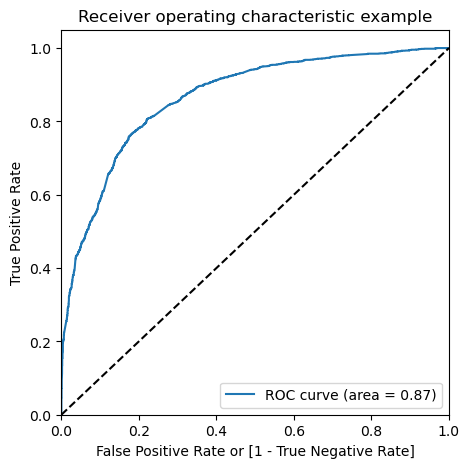

In [969]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [970]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.327650,0,1,1,1,1,0,0,0,0,0,0
1,0,0.193393,0,1,1,0,0,0,0,0,0,0,0
2,1,0.934806,1,1,1,1,1,1,1,1,1,1,1
3,1,0.629163,1,1,1,1,1,1,1,1,0,0,0
4,1,0.993946,1,1,1,1,1,1,1,1,1,1,1


In [971]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481352  1.000000  0.000000
0.1   0.1  0.569902  0.984594  0.185029
0.2   0.2  0.709269  0.946534  0.489066
0.3   0.3  0.760087  0.900770  0.629521
0.4   0.4  0.789313  0.809696  0.770395
0.5   0.5  0.789749  0.741731  0.834315
0.6   0.6  0.774482  0.673312  0.868377
0.7   0.7  0.736096  0.542365  0.915896
0.8   0.8  0.710578  0.448573  0.953743
0.9   0.9  0.651254  0.294517  0.982338


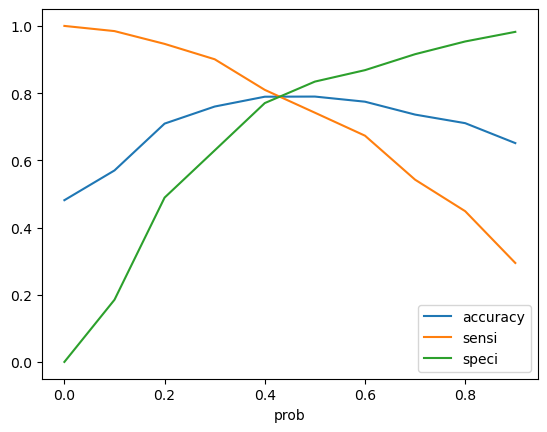

In [972]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.435 is the optimum point to take it as a cutoff probability.

In [973]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.435 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.327650,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.193393,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.934806,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.629163,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.993946,1,1,1,1,1,1,1,1,1,1,1,1


In [974]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7914940021810251

In [975]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1906,  472],
       [ 484, 1723]], dtype=int64)

In [976]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [977]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7806977797915723

In [978]:
# Let us calculate specificity
TN / float(TN+FP)

0.8015138772077376

In [979]:
# Calculate false postive rate - predicting Leads when customer does not have Leadsed
print(FP/ float(TN+FP))

0.1984861227922624


In [980]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7849658314350797


In [981]:
# Negative predictive value
print (TN / float(TN+ FN))

0.797489539748954


### Step 11: Precision and Recall

In [982]:
#Looking at the confusion matrix again

In [983]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1984,  394],
       [ 570, 1637]], dtype=int64)

##### Precision
TP / TP + FP

In [984]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8060068931560808

##### Recall
TP / TP + FN

In [985]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7417308563661078

Using sklearn utilities for the same

In [986]:
from sklearn.metrics import precision_score, recall_score

In [987]:
#?precision_score

In [988]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8060068931560808

In [989]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7417308563661078

#### Precision and recall tradeoff

In [990]:
from sklearn.metrics import precision_recall_curve

In [991]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4580    1
 4581    0
 4582    1
 4583    1
 4584    0
 Name: Converted, Length: 4585, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4580    1
 4581    0
 4582    1
 4583    1
 4584    0
 Name: predicted, Length: 4585, dtype: int64)

In [992]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

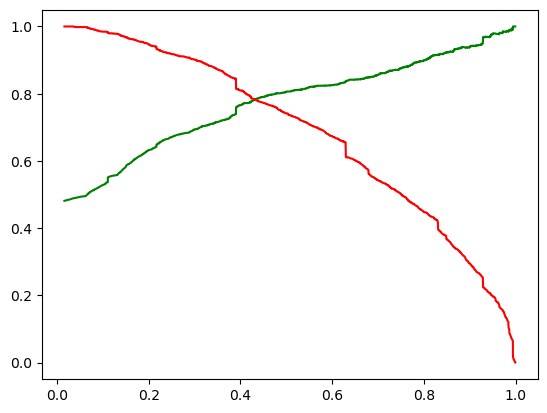

In [993]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 12: Making predictions on the test set

In [994]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [995]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
5966,-0.512016,False,False,False,False,False,True,False,True,False,False,False
152,-0.548637,False,False,False,True,False,False,False,True,False,True,False
5132,-0.646291,False,False,False,False,False,False,False,True,False,False,False
5308,-0.709069,False,False,False,False,False,False,False,True,False,False,False
5021,1.240536,False,False,False,False,False,True,False,True,False,False,False


In [996]:
X_test_sm = sm.add_constant(X_test)

In [997]:
    # Check X_test_sm

X_test_sm

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
5966,1.0,-0.512016,False,False,False,False,False,True,False,True,False,False,False
152,1.0,-0.548637,False,False,False,True,False,False,False,True,False,True,False
5132,1.0,-0.646291,False,False,False,False,False,False,False,True,False,False,False
5308,1.0,-0.709069,False,False,False,False,False,False,False,True,False,False,False
5021,1.0,1.240536,False,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,1.0,-0.956694,False,True,False,False,True,False,False,True,False,True,False
4610,1.0,1.978177,False,False,False,False,False,True,False,False,True,False,False
5496,1.0,-0.703838,False,False,False,False,False,False,False,True,False,False,False
8257,1.0,-0.735227,False,False,False,False,False,True,False,False,True,False,False


Making predictions on the test set

In [998]:
y_test_pred = res.predict(X_test_sm.astype(float))

In [999]:
y_test_pred[:10]

5966    0.399557
152     0.026288
5132    0.177422
5308    0.167360
5021    0.826614
8191    0.830236
8389    0.068714
417     0.158543
6879    0.986242
3513    0.459398
dtype: float64

In [1000]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1001]:
# Let's see the head
y_pred_1.head()

,0
5966,0.399557
152,0.026288
5132,0.177422
5308,0.167360
5021,0.826614


In [1002]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1003]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1004]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1005]:
y_pred_final.head()

,Converted,0
0,0,0.399557
1,0,0.026288
2,0,0.177422
3,0,0.167360
4,1,0.826614


In [1006]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [1007]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.399557
1,0,0.026288
2,0,0.177422
3,0,0.167360
4,1,0.826614


In [1008]:
# Make predictions on the test set using 0.435 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.435 else 0)

In [1009]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.399557,0
1,0,0.026288,0
2,0,0.177422,0
3,0,0.167360,0
4,1,0.826614,1


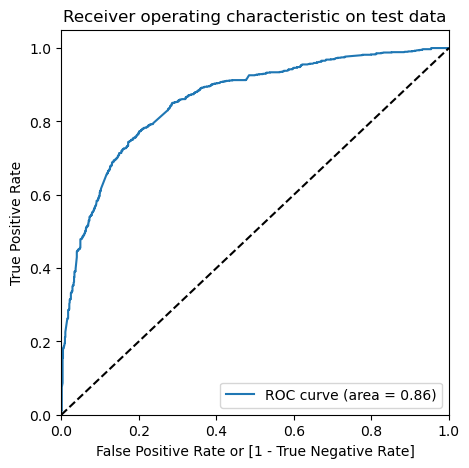

In [1010]:
def draw_roc( actual, probs ):    # ROC for test data set
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic on test data')
    plt.legend(loc="lower right")
    plt.show()

    return None
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )
# Call the ROC function
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

In [1011]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7852417302798982

In [1012]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[785, 196],
       [226, 758]], dtype=int64)

In [1013]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1014]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7703252032520326

In [1015]:
# Let us calculate specificity
TN / float(TN+FP)

0.800203873598369